In [1]:
import numpy as np

import math

from scipy.integrate import odeint

In [2]:
m, l, g, k, u = 1.2, 1.2, 9.81, 2.2, 1.3

In [3]:
steps = 101

In [4]:
def dthetadt(theta, t, m, l, g, k, u): 
    return np.array([theta[1], (u - k*l**2*theta[1] - m*g*l*np.sin(theta[0])) / (m*l**2)])

In [5]:
t = np.linspace(0, 10, steps)

In [6]:
theta0 = np.array([np.pi - 2, 0.0])

### Getting ODE solution (odeint)

In [7]:
sol = odeint(dthetadt, theta0, t, args=(m, l, g, k, u))

### Plotting solution of ODE (odeint)

In [8]:
import matplotlib.pyplot as plt

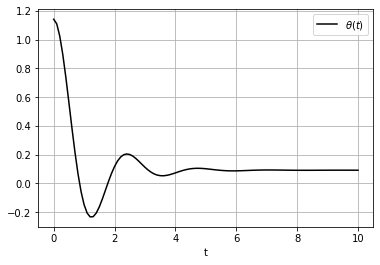

In [9]:
plt.plot(t, sol[:, 0], 'k', label=r'$\theta(t)$')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

### Euler

In [10]:
def euler(f, theta0, t, args=()):
    n = len(t)
    global steps
    h = t[1] - t[0]
    theta = np.zeros((n, len(theta0)))
    theta[0] = theta0
    for i in range(n - 1):
        theta[i + 1] = theta[i] + h * f(theta[i], t[i], *args)
    return theta    

In [11]:
sol = euler(dthetadt, theta0, t, args=(m, l, g, k, u))

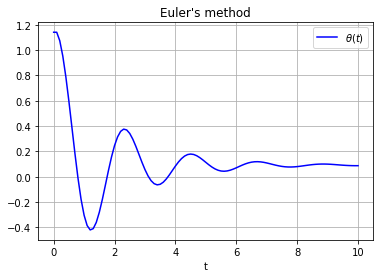

In [12]:
plt.plot(t, sol[:, 0], 'b', label=r'$\theta(t)$')
plt.legend(loc='best')
plt.xlabel('t')
plt.title('Euler\'s method')
plt.grid()
plt.show()

### Average point

In [13]:
def average_point(f, theta0, t, args=()):
    n = len(t)
    global steps
    h = t[1] - t[0]
    theta = np.zeros((n, len(theta0)))
    theta[0] = theta0
    for i in range(1, n):
        theta[i] = theta[i-1] + h * f(theta[i-1] + (h/2) * f(theta[i-1], t[i-1], *args), t[i-1] + h/2, *args)
    return theta 

In [14]:
sol = average_point(dthetadt, theta0, t, args=(m, l, g, k, u))

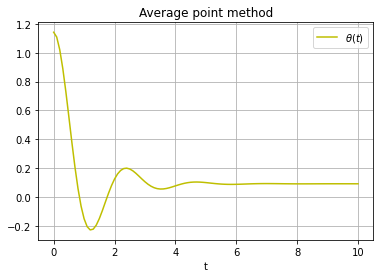

In [15]:
plt.plot(t, sol[:, 0], 'y', label=r'$\theta(t)$')
plt.legend(loc='best')
plt.xlabel('t')
plt.title('Average point method')
plt.grid()
plt.show()

### Euler-cauchy

In [16]:
def euler_cauchy(f, theta0, t, args=()):
    n = len(t)
    h = t[1] - t[0]
    theta = np.zeros((n, len(theta0)))
    theta[0] = theta0
    for i in range(1, n):
        k1 = h * f(theta[i-1], t[i-1], *args)
        k2 = h * f(theta[i - 1] + k1, t[i], *args)
        theta[i] = theta[i-1] + (k1 + k2) / 2
    return theta

In [17]:
sol = euler_cauchy(dthetadt, theta0, t, args=(m, l, g, k, u))

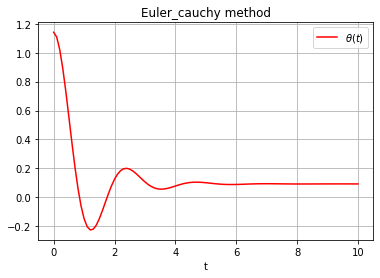

In [18]:
plt.plot(t, sol[:, 0], 'r', label=r'$\theta(t)$')
plt.legend(loc='best')
plt.xlabel('t')
plt.title('Euler_cauchy method')
plt.grid()
plt.show()

### RungeKutta4

In [19]:
def rungekutta4(f, theta0, t, args=()):
    n = len(t)
    h = t[1] - t[0]
    theta = np.zeros((n, len(theta0)))
    theta[0] = theta0
    for i in range(n - 1):
        k1 = f(theta[i], t[i], *args)
        k2 = f(theta[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(theta[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(theta[i] + k3 * h, t[i] + h, *args)
        theta[i+1] = theta[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return theta

In [20]:
sol4 = rungekutta4(dthetadt, theta0, t, args=(m, l, g, k, u))

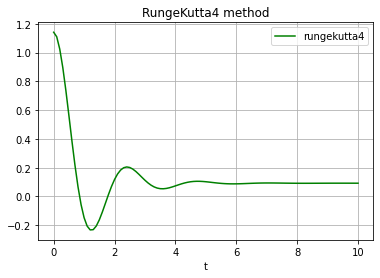

In [21]:
plt.plot(t, sol4[:, 0], 'g', label='rungekutta4')
plt.title('RungeKutta4 method')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

### AdamsBashforth5

In [22]:
def adamsbashforth5(f, theta0, t, args=()):
    n = len(t)
    h = t[1] - t[0]
    theta = np.zeros((n, len(theta0)))
    theta[:5] = rungekutta4(f, theta0, t[:5], args=(m, l, g, k, u))
    for i in range(5, n):
        theta[i] = theta[i-1] + h * ((1901/720)*f(theta[i-1],t[i-1],*args) - (1307/360)*f(theta[i-2],t[i-2],*args) + (109/30)*f(theta[i-3],t[i-3],*args) - (637/360)*f(theta[i-4],t[i-4],*args) + (251/720)*f(theta[i],t[i],*args))        
    return theta

In [23]:
sol = adamsbashforth5(dthetadt, theta0, t, args=(m, l, g, k, u))

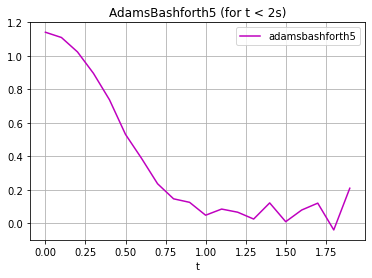

In [24]:
plt.plot(t[:20], sol[:, 0][:20], 'm', label='adamsbashforth5')
plt.title(f'AdamsBashforth5 (for t < 2s)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

### Comparison

In [25]:
methods = ['euler', 'average_point', 'euler_cauchy', 'rungekutta4', 'adamsbashforth5']

In [26]:
steps = [10**(-3), 10**(-2), 2*10**(-2), 10**(-1)]

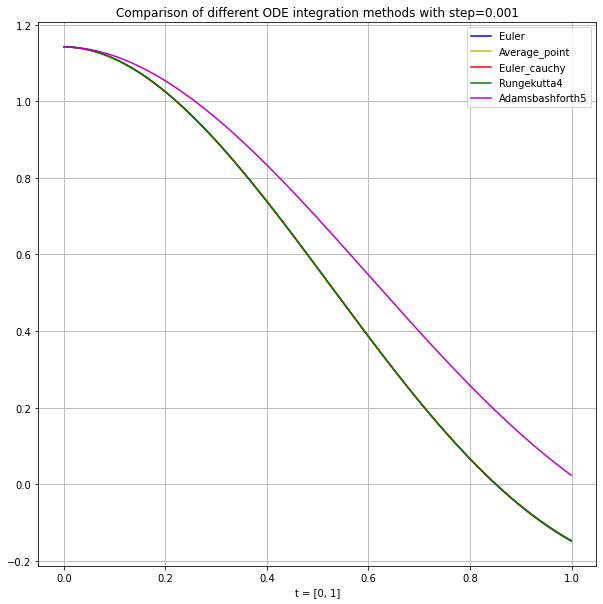

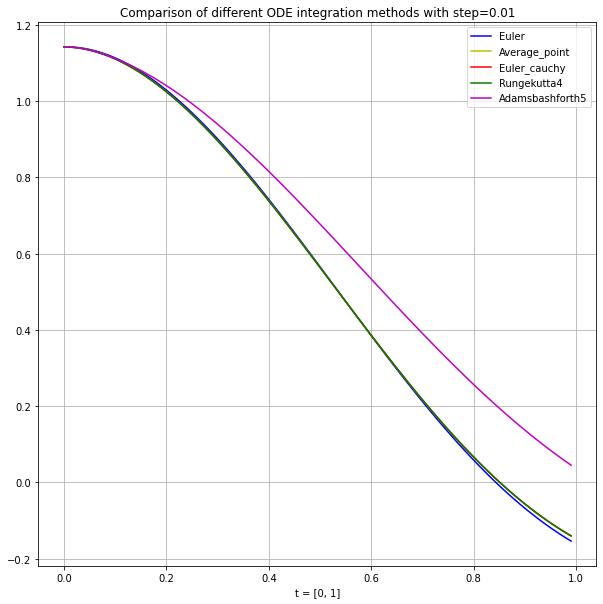

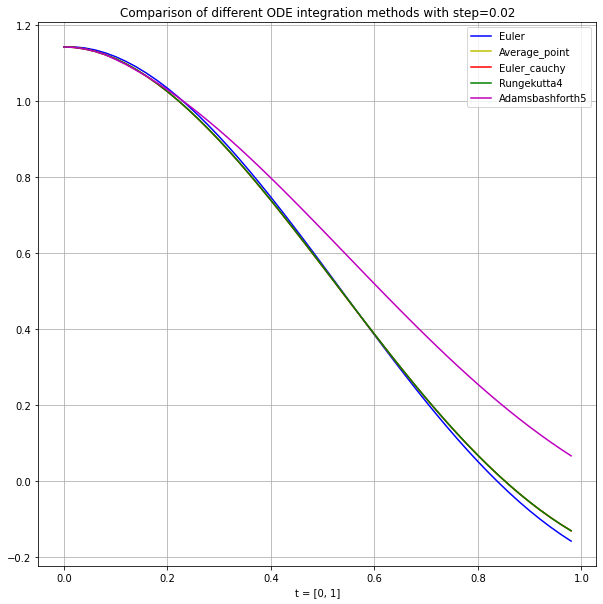

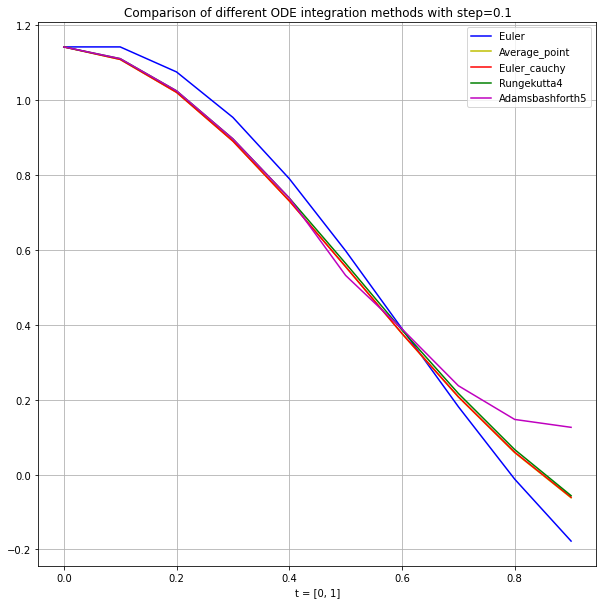

In [30]:
for step in steps:
    fig = plt.figure(figsize=(10, 10))
    colors = ['b', 'y', 'r', 'g', 'm']
    t = np.arange(0, 1, step)
    for method in methods:
        sol = eval(method)(dthetadt, theta0, t, args=(m, l, g, k, u))
        plt.plot(t, sol[:, 0], colors.pop(0), label=f'{method.capitalize()}')
    plt.legend(loc='best')
    plt.title(f'Comparison of different ODE integration methods with step={step}')
    plt.xlabel('t = [0, 1]')
    plt.grid()
    plt.show()